# MC data with different BDT cuts

The goal is to test the hypothesis that the tails of the MC distribution is not dependent on the BDT cut

In [1]:
name_BDT = 'gradient'
var = 'Dst_constr_B0_M'

## Import

In [2]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets
import pandas as pd


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, add_constr_Dst, load_saved_root
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


## Load

In [3]:
df_MC = load_saved_root('MC_'+ name_BDT, name_folder='MC')

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/MC/MC_gradient.root


In [4]:
df_MC.columns

Index(['B0_M', 'tau_M', 'Dst_M', 'D0_M', 'BDT', 'Dst_constr_B0_M'], dtype='object')

## BDT ouput

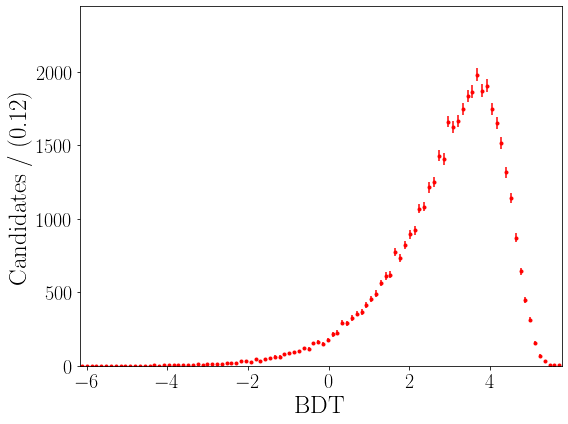

In [5]:
fig, ax = h.plot_hist_particle({'MC':df_MC}, 'BDT',
              n_bins = 100, mode_hist = False, colors='red', save_fig=False)

## Different categories of BDT

### 4 categories with equal number of events

In [6]:
low = df_MC['BDT'].min()
high = df_MC['BDT'].max()

In [7]:
counts, _, centres, err = h.get_count_err(df_MC['BDT'], n_bins=100, low=low, high=high)

In [8]:
n_categories = 4

In [9]:
cum_counts = 0
total_counts = sum(counts)
l_BDT_cut = []
for k, count in enumerate(counts):
    cum_counts += count
    if cum_counts >= total_counts/n_categories:
        cum_counts = 0
        l_BDT_cut.append(centres[k])
print(l_BDT_cut)

[2.1348654691095357, 3.211512602731861, 3.9292773584800775]


In [10]:
l_BDT_cut.insert(0, low)
l_BDT_cut.append(high)

In [11]:
dfs = {}
for i in range(len(l_BDT_cut)-1):
    df_MC_cat = df_MC.query(f"BDT > {l_BDT_cut[i]} and BDT < {l_BDT_cut[i+1]}")
    legend = f"{l_BDT_cut[i]:.2f} $<$ BDT $<$ {l_BDT_cut[i+1]:.2f}"
    dfs[legend] = df_MC_cat

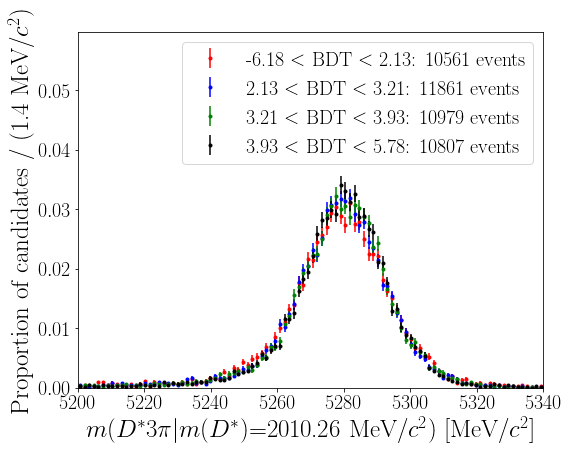

In [54]:
fig, ax = h.plot_hist_particle(dfs, var,
                               alpha=[0.95, 0.8, 0.65, 0.4], low=5200, high=5340,
                               n_bins = 100, mode_hist = False, save_fig=False)

## 3 curves

In [12]:
df_opt = df_MC.query('BDT > -1.25')
df_max = df_MC.query('BDT > 1.75')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_MC_MC_with_BDT_>_-1.25__MC_with_BDT_>_1.75


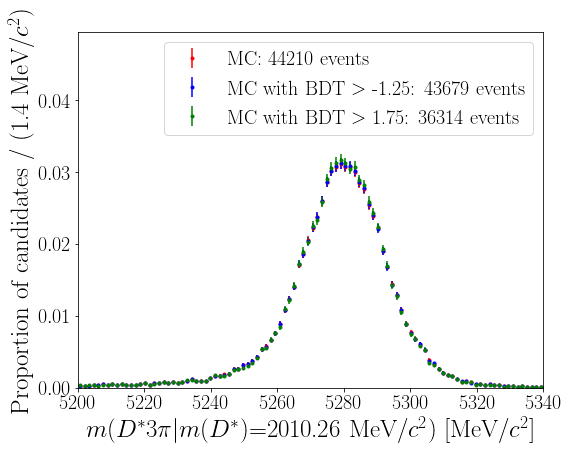

In [14]:
fig, ax = h.plot_hist_particle({'MC': df_MC, 'MC with BDT $>$ -1.25': df_opt,
                               ' MC with BDT $>$ 1.75': df_max}, var,
                               alpha=[0.95, 0.8, 0.65, 0.4], low=5200, high=5340,
                               n_bins = 100, mode_hist = False)